<a href="https://colab.research.google.com/github/Prajwl-hash/Genai/blob/main/vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
!{sys.executable} -m pip install gensim
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 55.2 MB/s eta 0:00:00


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Most similar words to 'queen' (result of king - man + woman):
king: 0.8449392318725586
queen: 0.7300517559051514
monarch: 0.645466148853302
princess: 0.6156251430511475
crown_prince: 0.5818676352500916


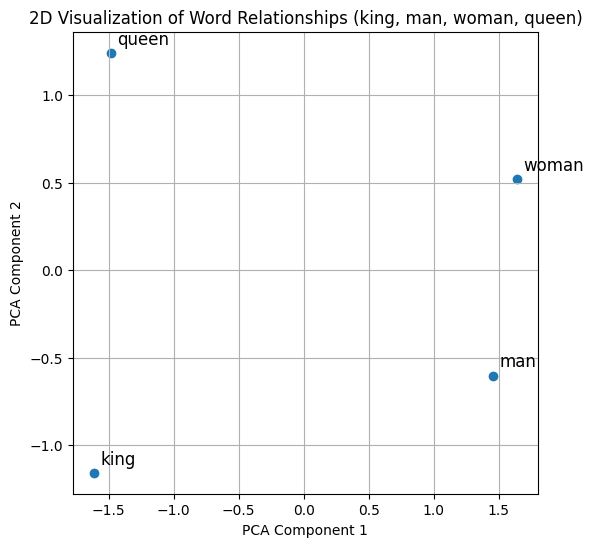

In [ ]:
model = api.load('word2vec-google-news-300')

# Example word relationships using vector arithmetic
words = ['king', 'man', 'woman', 'queen']
vectors = [model[word] for word in words]

# Performing word vector arithmetic: king - man + woman = queen
king = model['king']
man = model['man']
woman = model['woman']
queen = king - man + woman

# Find the most similar words to the resulting vector (queen)
similar_words = model.most_similar(queen, topn=5)
print("Most similar words to 'queen' (result of king - man + woman):")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

# Visualizing the word vectors
# Reduce the dimensionality to 2D using PCA
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Plotting the result
plt.figure(figsize=(6, 6))
plt.scatter(result[:, 0], result[:, 1])

# Adding text annotations for each word
for i, word in enumerate(words):
    plt.text(result[i, 0] + 0.05, result[i, 1] + 0.05, word, fontsize=12)

plt.title("2D Visualization of Word Relationships (king, man, woman, queen)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

Loading pre-trained Word2Vec model...
Performing dimensionality reduction...


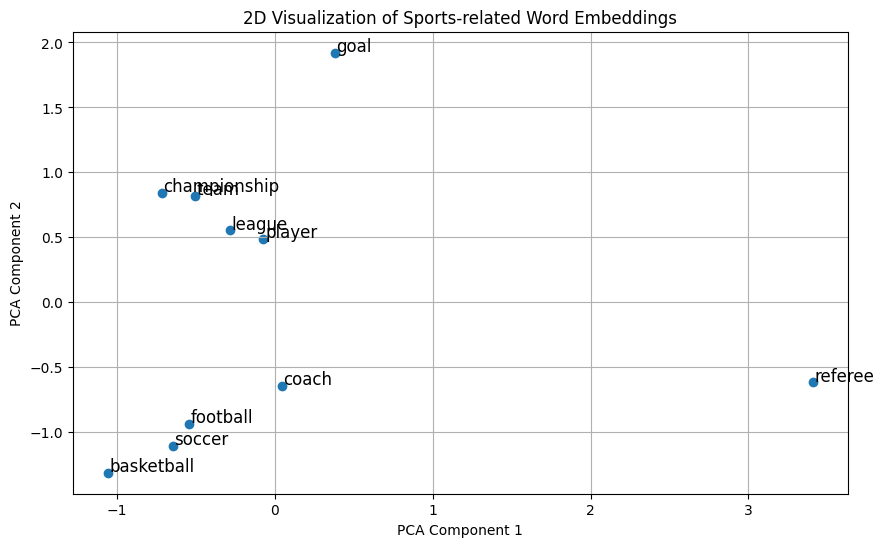


Most similar words to 'soccer':
Soccer: 0.7622618675231934
football: 0.7313547730445862
basketball: 0.6810985207557678
volleyball: 0.6647275686264038
softball: 0.6443415284156799


In [ ]:
# Load pre-trained Word2Vec model
print("Loading pre-trained Word2Vec model...")
model = api.load('word2vec-google-news-300')

# List of 10 sports-related words
sports_words = ['soccer', 'football', 'basketball', 'player', 'team',
  'coach', 'referee', 'goal', 'championship', 'league']

# Get the word vectors for the selected words
word_vectors = [model[word] for word in sports_words]

# Perform dimensionality reduction using PCA (or t-SNE for more detailed separation)
print("Performing dimensionality reduction...")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Visualize the word embeddings in 2D
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

# Annotate words on the 2D plot
for i, word in enumerate(sports_words):
    plt.text(pca_result[i, 0] + 0.01, pca_result[i, 1] + 0.01, word, fontsize=12)

plt.title("2D Visualization of Sports-related Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Function to find 5 semantically similar words for a given word
def find_similar_words(input_word, top_n=5):
    try:
        similar_words = model.most_similar(input_word, topn=top_n)
        print(f"\nMost similar words to '{input_word}':")
        for word, similarity in similar_words:
            print(f"{word}: {similarity}")
    except KeyError:
        print(f"Word '{input_word}' not found in the model vocabulary.")

# Test the function with a sample word from the sports domain
input_word = 'soccer'
find_similar_words(input_word)